## Final Project Submission

Please fill out:
* Student name: Jessica Forrest-Baldini
* Student pace: Part-time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## Import Packages & Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from datetime import datetime as date
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('kc_house_data.csv') 
df = pd.DataFrame(data)

## Clean  & Explore Data

Let's take a look at what we're working with here and check the column names, data types and any null data there might be.

In [2]:
# Look at column names and first 5 rows
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


We'll start by dropping the columns we know we won't be using. Referenced in the file 'column_names.md' in this repository.

In [3]:
# Drop waterfront - only 146 homes with waterfronts
# Drop view - this represent if the property has been viewed
# Drop id

to_drop = ['waterfront','view','id']
df = df.drop(to_drop, axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(6), int64(10), object(2)
memory usage: 3.0+ MB


We can see date and sqft_basement are objects, so we'll go ahead and clean those.

In [5]:
# Let's take a look at date
df.date[0]

'10/13/2014'

We can see date is in string format. Let's go ahead and clean it up by converting it to number format. I'm actually going to convert it to a MATLAB style datenumber so I can include it in the model. 

In [6]:
# Define function to convert datestr to datenum
def datenum(datestr):
    '''
    Convert datestring in the format MM/DD/YYYY
    to MATLAB style datenum
    '''
    datenum = date.toordinal(date((int(datestr.split('/', -1)[2])),
                                  (int(datestr.split('/', -1)[0])),
                                  (int(datestr.split('/', -1)[1]))
                                 ))+366
    return datenum

# Apply to date column
df.date = df.date.map(datenum)

Now let's take care of sqft_basement. Let's take a look.

In [7]:
# Check out the unique values
df.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

We can see the null values are input as '?' and that the column is in string format. Let's go ahead and correct that. 

In [8]:
# Replace NaN basement values with 0 as there are only 454 of them 
df.sqft_basement = df.sqft_basement.replace('?','0.0').astype(float)

Let's take a look at the columns to see which ones have null data.

In [9]:
# Count NaNs in each column
df.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

It looks like yr_renovated has some null values. Let's take a closer look.

In [10]:
# Sort column with NaNs first
df.yr_renovated.sort_values(na_position='first').head()

2    NaN
12   NaN
23   NaN
26   NaN
28   NaN
Name: yr_renovated, dtype: float64

In [11]:
# Let's take a look at the summary statistics
df.yr_renovated.describe()

count    17755.000000
mean        83.636778
std        399.946414
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [12]:
# How many homes were renovated? 
sum(df.yr_renovated > 0)

744

It looks like there are NaN values, and also that a home not renovated is entered as '0'. Since only 744 homes have been renovated out of about 21,000, I'm going to fill the 'NaN' values with '0'.

In [13]:
# Fill with 0
df.yr_renovated = df.yr_renovated.fillna(0)

Let's take a look at our summary statistics for the dataset.

In [14]:
# Summary statistics
df.describe().round()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0
mean,735901.0,540297.0,3.0,2.0,2080.0,15099.0,1.0,3.0,8.0,1789.0,286.0,1971.0,69.0,98078.0,48.0,-122.0,1987.0,12758.0
std,113.0,367368.0,1.0,1.0,918.0,41413.0,1.0,1.0,1.0,828.0,440.0,29.0,364.0,54.0,0.0,0.0,685.0,27274.0
min,735721.0,78000.0,1.0,0.0,370.0,520.0,1.0,1.0,3.0,370.0,0.0,1900.0,0.0,98001.0,47.0,-123.0,399.0,651.0
25%,735802.0,322000.0,3.0,2.0,1430.0,5040.0,1.0,3.0,7.0,1190.0,0.0,1951.0,0.0,98033.0,47.0,-122.0,1490.0,5100.0
50%,735888.0,450000.0,3.0,2.0,1910.0,7618.0,2.0,3.0,7.0,1560.0,0.0,1975.0,0.0,98065.0,48.0,-122.0,1840.0,7620.0
75%,736012.0,645000.0,4.0,2.0,2550.0,10685.0,2.0,4.0,8.0,2210.0,550.0,1997.0,0.0,98118.0,48.0,-122.0,2360.0,10083.0
max,736111.0,7700000.0,33.0,8.0,13540.0,1651359.0,4.0,5.0,13.0,9410.0,4820.0,2015.0,2015.0,98199.0,48.0,-121.0,6210.0,871200.0


It looks like bedrooms may have an oulier at 33. Let's take a closer look. 

In [15]:
# Compare with other homes in data set that have high number of bedrooms
df[df.bedrooms > 9] 

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8748,735832,520000.0,11,3.00,3000,4960,2.0,3,7,2400,600.0,1918,1999.0,98106,47.5560,-122.363,1420,4960
13301,735825,1150000.0,10,5.25,4590,10920,1.0,3,9,2500,2090.0,2008,0.0,98004,47.5861,-122.113,2730,10400
15147,735901,650000.0,10,2.00,3610,11914,2.0,4,7,3010,600.0,1958,0.0,98006,47.5705,-122.175,2040,11914
15856,735775,640000.0,33,1.75,1620,6000,1.0,5,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700
19239,735962,660000.0,10,3.00,2920,3745,2.0,4,7,1860,1060.0,1913,0.0,98105,47.6635,-122.320,1810,3745


33 bedrooms and only 1.75 bathrooms doesn't seem right. It is a pretty small home for 33 rooms at 1,620sqft. This may have been intended to be 3 bedrooms, so it could be changed to '3'. For now though, I'm going to remove it.

In [16]:
# Drop outlier
to_drop = df[df.bedrooms == 33].index
df = df.drop(to_drop)

Longitude is in negative values, but I want to include it in my model, so I'm going to take the absolute value. This way I can normalize it later on.

In [17]:
# Take abs of longitude for normalization later on
df.long = abs(df.long)

Let's take another look at the summary statistics.

In [18]:
# Summary stats 
df.describe().round()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21596.0,21596.0,21596.0,21596.0,21596.0,21596.0,21596.0,21596.0,21596.0,21596.0,21596.0,21596.0,21596.0,21596.0,21596.0,21596.0,21596.0,21596.0
mean,735901.0,540292.0,3.0,2.0,2080.0,15100.0,1.0,3.0,8.0,1789.0,286.0,1971.0,69.0,98078.0,48.0,122.0,1987.0,12759.0
std,113.0,367376.0,1.0,1.0,918.0,41414.0,1.0,1.0,1.0,828.0,440.0,29.0,364.0,54.0,0.0,0.0,685.0,27275.0
min,735721.0,78000.0,1.0,0.0,370.0,520.0,1.0,1.0,3.0,370.0,0.0,1900.0,0.0,98001.0,47.0,121.0,399.0,651.0
25%,735802.0,322000.0,3.0,2.0,1430.0,5040.0,1.0,3.0,7.0,1190.0,0.0,1951.0,0.0,98033.0,47.0,122.0,1490.0,5100.0
50%,735888.0,450000.0,3.0,2.0,1910.0,7619.0,2.0,3.0,7.0,1560.0,0.0,1975.0,0.0,98065.0,48.0,122.0,1840.0,7620.0
75%,736012.0,645000.0,4.0,2.0,2550.0,10686.0,2.0,4.0,8.0,2210.0,550.0,1997.0,0.0,98118.0,48.0,122.0,2360.0,10083.0
max,736111.0,7700000.0,11.0,8.0,13540.0,1651359.0,4.0,5.0,13.0,9410.0,4820.0,2015.0,2015.0,98199.0,48.0,123.0,6210.0,871200.0


Price looks like it has some big outliers. The 75th percentile is \\$ 645,000 and the max is \\$ 7,700,000, which is \\$ 7M more. 

In addition, sqft_lot appears to have some big outliers with the 75th percentile being just 10,686 sq. ft. while the max is 1,651,359 sq. ft.

We'll take a closer look during feature engineering to remove extreme outliers.

Alright, it looks like out data are pretty well cleaned up. Let's continue on with our exploratory data analysis so we can gain some valuable insights before we begin modeling.

We'll start by looking at our feature distributions to see which ones appear to be normally distributed and which ones are skewed. That way we'll know which ones we're going to log transform.

We'll also be able to see which features are categorical and if any features require binning.

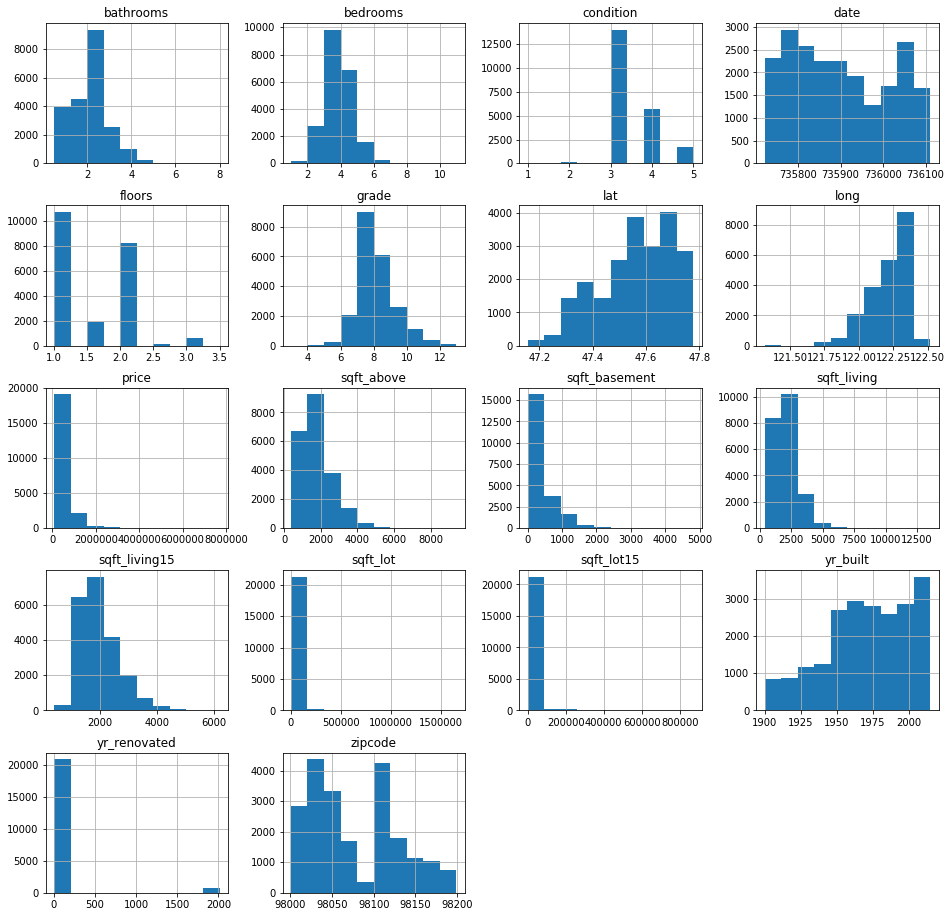

In [19]:
# Check out feature distributions
df.hist(figsize=(16,16) );

We can see that condition and grade are technically categorical, but since they're on a scale I'm going to treat them as continuous. 

Most of the data are skewed, so we will log transform and since we're log transforming, we won't be able to get an exact estimate of price. Since I want to know which variables or features have the greatest influence on price, I will min-max scale as well and compare the coefficients. 

And since sqft_basement and yr_renovated are combined continuous, but also sort of binary since some have the feature and some don't, I'm going to bin these and drop the first bin of '0' for one-hot encoding.

## Exploratory Analysis

### Price vs. Sqft Basement
I'm curious to see if there is a relationship between sqft_basement and price.

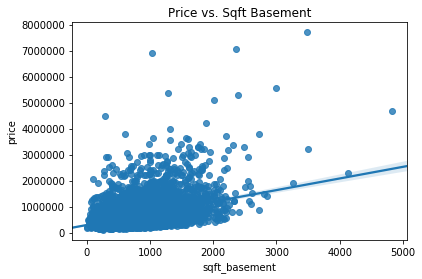

In [20]:
# Regression plot for all homes with basements

sns.regplot(df[df.sqft_basement > 0].sqft_basement,df[df.sqft_basement > 0].price)
plt.title('Price vs. Sqft Basement');

We can see there does appear to be a relationship between the size of a home's basement and its selling price.

### Price vs. Year Renovated
Now let's take a look at the relationship between year renovated and price.

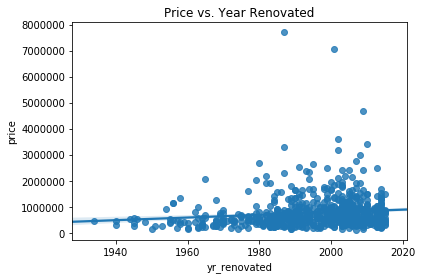

In [21]:
# Regression plot for all homes that have been renovated

sns.regplot(df.yr_renovated[df.yr_renovated > 0],df.price[df.yr_renovated > 0])
plt.title('Price vs. Year Renovated');

We can see there does appear to be a slight linear relationship between the size of a home's basement and its selling price with a lot of variation most likely due to other features that affect price. 

### Price vs. Grade

I looked up the King County Grading system to see what grade represents. Basically grade 1-3 falls short of bulding code, while 13 represents mansion level. Let's take a look at the relationship between grade and price.

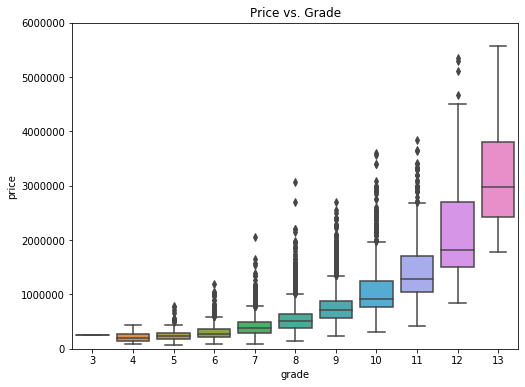

In [22]:
# Use box plot to see the relationship between grade & price

plt.figure(figsize=(8,6))
fig = sns.boxplot(x='grade', y='price', data=df)
plt.title('Price vs. Grade');

# Set ymax to $6M for viewing. There are a few outliers up to around $8M.
fig.axis(ymin=0, ymax=6000000);

We can see there is a definite relationship here between grade and price. It appears to be exponential. This feature could be added as a polynomial feature, but to start I'm going to leave it linear and see how the model does. 

Something to note is that the top 1% of home prices were removed as extreme outliers. These were homes that were priced up to almost \\$8M. Grade 13 is mansion. There were mansions, but it looks like all of them except for 1 were removed. A some of the extreme outliers in grades 11-12 were removed as well as they were included in the top 1% of price. 

The link to the grading scale can be found here: https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r.

### Price vs. Condition

I looked up the King County Grading system to see what condition represents. Condition 3 is average. Less than 3 would require repairs. 4 is good, showing regular wear, but no repairs needed. Condition 5 is very good, upgrades have been made or home is new. 

I imagine this would have a relationship with the price as well. 

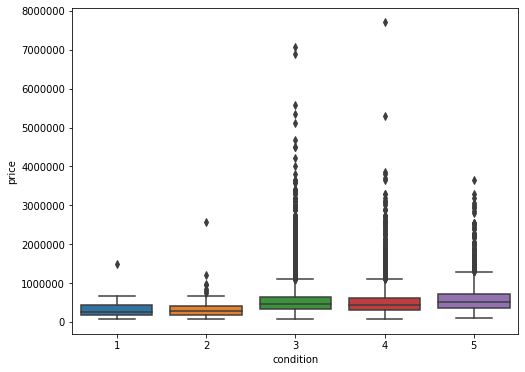

In [23]:
# Use box plot to see the relationship between condition & price

plt.figure(figsize=(8,6))
fig = sns.boxplot(x='condition', y='price', data=df)

While there does appear to be an increase in price with each level of condition, we can see there are a lot of outliers. This is most likely due to other features that interact with condition to affect price, such as grade, I imagine square foot living, number of bedrooms, etc.

### Price vs. Bedrooms

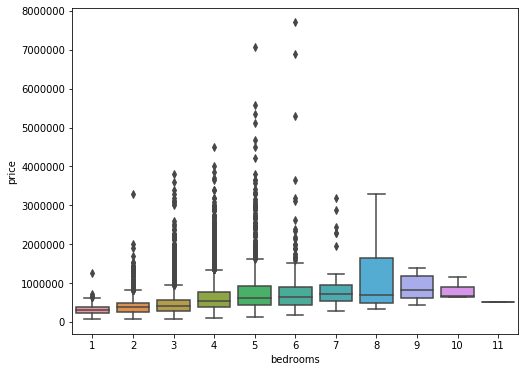

In [24]:
# Use box plot to see the relationship between bedrooms & price

plt.figure(figsize=(8,6))
fig = sns.boxplot(x='bedrooms', y='price', data=df)

There does appear to be a relationship here as well, but again with a lot of outliers, which are probably due to other features playing a role. 

### Price vs. Bathrooms

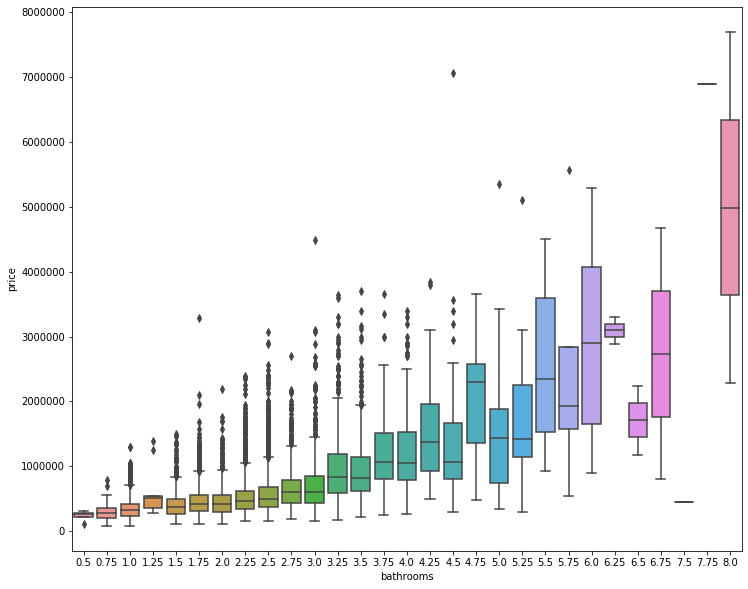

In [25]:
# Use box plot to see the relationship between bathrooms & price

plt.figure(figsize=(12,10))
fig = sns.boxplot(x='bathrooms', y='price', data=df)

## Feature Engineering

- Remove extreme outliers in the data
- One-hot encode
- Normalize

### Remove Extreme Outliers

We could see during the EDA and data cleaning that there were some extreme outliers when it came to price and square feet. These are the mansion level homes. So, we're going to take a closer look at the percentiles here to remove the extreme outliers. 

In [26]:
# Percentiles for price

# Define percentiles
percentiles = [0,1,99,100]

# Print them out
for i in percentiles:
    q = i/100
    print("{} percentile: {}".format(q, df.price.quantile(q=q)))

0.0 percentile: 78000.0
0.01 percentile: 154000.0
0.99 percentile: 1970000.0
1.0 percentile: 7700000.0


In [27]:
# Remove extreme outliers in the lower and upper 1%

# Get original length to see percent removed
orig_tot = len(df)

# Subset to remove extreme outliers
df = df[(df.price >= 154000.0) & (df.price <= 1970000.0)] 

# Calculate percent removed
print('Percent removed:', (orig_tot -len(df))/orig_tot)

Percent removed: 0.019864789775884423


Now for sqft_lot.

In [28]:
# Percentiles for sqft_lot

# Print them out
for i in percentiles:
    q = i/100
    print("{} percentile: {}".format(q, df.sqft_lot.quantile(q=q)))

0.0 percentile: 520.0
0.01 percentile: 1010.6600000000001
0.99 percentile: 213008.0
1.0 percentile: 1651359.0


In [29]:
# Remove extreme outliers in the lower and upper 1%

# Get original length to see percent removed
orig_tot = len(df)

# Subset to remove extreme outliers
df = df[(df.sqft_lot >= 1010.61) & (df.sqft_lot <= 213008.0)]

# Calculate percent removed
print('Percent removed:', (orig_tot -len(df))/orig_tot)

Percent removed: 0.019842207209335286


### One-Hot Encode

Let's bin and one-hot encode sqft_basement and yr_renovated.

In [30]:
# Get quartile cuts for homes with a basement

bins = pd.qcut(df.sqft_basement[df.sqft_basement > 0],q=4)
bins.value_counts()

(9.999, 450.0]     2048
(450.0, 700.0]     2035
(960.0, 3260.0]    1983
(700.0, 960.0]     1914
Name: sqft_basement, dtype: int64

In [31]:
# Bin sqft_basement

bins_sqft_basement = [0,10,450,980,5000]

# Define function to return dummies
def binned_dummies(data, features, bins):
    data_bins = pd.cut(data, bins)
    data_bins = data_bins.cat.as_unordered()
    dummies = pd.get_dummies(data_bins, prefix = features, drop_first=True)
    return dummies

dummies_sqft_basement = binned_dummies(df.sqft_basement,'sqft_basement', bins_sqft_basement)

# Remove original column from data set
df = df.drop(['sqft_basement'], axis=1)
                                            
# Add new columns in
df = pd.concat([df, dummies_sqft_basement], axis=1)

Let's do the same for yr_renovated.

In [32]:
# Get quartile cuts for homes that have been renovated

bins = pd.qcut(df.yr_renovated[df.yr_renovated > 0],q=4)
bins.value_counts()

(1987.0, 2000.0]      191
(1933.999, 1987.0]    181
(2008.0, 2015.0]      166
(2000.0, 2008.0]      166
Name: yr_renovated, dtype: int64

In [33]:
# Bin 'yr_renovated'

bins_yr_renovated = [0,1933,1987,2000,2008,2015]

dummies_yr_renovated = binned_dummies(df.yr_renovated,'yr_renovated', bins_yr_renovated)

# Remove original column from data set
df = df.drop(['yr_renovated'], axis=1)
                                            
# Add new columns in
df = pd.concat([df, dummies_yr_renovated], axis=1)

### Normalize 

Normalize data by log transforming, normalizing and min-max scaling. We're doing this to meet the normal assumption as many of our features have skewed data.

In [34]:
# Normalize Data

# Continuous features
features = ['date','price','sqft_living','lat','long','bedrooms',
            'bathrooms','floors','condition','grade','sqft_lot',
            'sqft_above','yr_built','sqft_living15','sqft_lot15',
            'zipcode']

df_cont_features = df[features]

### Log transform ###

df_log = np.log(df_cont_features)
#df_log.columns = log_names


### Normalize ###

# Define function to normalize
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

# Apply function to normalize
df_log_norm = df_log.apply(normalize)

### Min-Max Scale ###

# Define function to min-max scale
def minmaxscale(feature):
    return (feature-min(feature))/(max(feature)-min(feature))

# Apply function to min-max scale
df_log_norm_scale = df_log.apply(minmaxscale)

# Remove original column from data set
df = df.drop(features, axis=1)

# Add new columns in
df = pd.concat([df, df_log_norm_scale], axis=1) 

In [35]:
# df.head()

## Check for Multicollinearity 

### Multicollinearity

Let's take a look at our continuous features to check for multicollinearity. I prefer to look at a boolean correlation matrix so I can easily search for instances of 'True' in a column as I find that easier to look at than a heatmap.  So we're doing to take a look here. 

In [67]:
# Take a look at the correlation matrix to check for multicollinearity
abs(df[features].corr()) > 0.75

,date,price,sqft_living,lat,long,bedrooms,bathrooms,floors,condition,grade,sqft_lot,sqft_above,yr_built,sqft_living15,sqft_lot15,zipcode
date,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False
lat,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
long,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
grade,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [37]:
# # Check & see if sqft_lot15 & sqft_living15 are correlated with sqft_lot & sqft_living
# sns.regplot(df.sqft_lot,df.sqft_lot15)
# plt.show()
# sns.regplot(df.sqft_living,df.sqft_living15)
# plt.show()

We can see that 'sqft_lot15' & 'sqft_living15' are correlated with 'sqft_lot' & 'sqft_living', which makes sense because the features appended with 15 represent the average of the 15 nearest neighbors. 

We will remove these values to prevent multicollinearity in our model. 

In [38]:
# # Remove sqft_lot15 & sqft_living15
# df = df.drop(['sqft_lot15','sqft_living15'], axis=1)

In [39]:
# # Take a look at the correlation matrix to check for multicollinearity
# df.corr() > 0.75

We can see here that 'sqft_living' seems to be highly correlated with multiple features such as 'bathrooms', 'grade', and 'sqft_above'. 'sqft_living' represents the square footage of the entire home and seems that it would be a strong indicator of home price. The squarefoot of other features are essentially subsets of the overall home squarefootage. So for now I am going to remove it. However, it could be kept in place and other features removed later on to see if this improves the overall performance of the model.

In [40]:
# # Remove 'sqft_living' to prevent multicollinearity 
# # as it is highly correlated with multiple features

# df = df.drop(['sqft_living'], axis=1)

In [41]:
# abs(df.corr()) > 0.75

It looks like 'sqft_above' and 'grade' are highly correlated, so we should only keep one to prevent multicollinearity. 

For now I'm going to keep 'sqft_above', but can also test removing 'sqft_above' and one-hot-encoding 'grade' later on to see if it improves performance of the model. 

In [42]:
# # We can see the relationship here between 'sqft_above' and 'grade', it appears to possibly
# # be polynomial. While grade is categorical, it is continuous
# sns.regplot(df.grade,df.sqft_above);

Since the relationship looks slightly polynomial, and 'grade' technically is categorical, I want to look at their distributions to further explore the relationship. Let's look at the histograms/distplot.

In [43]:
# sns.distplot(df.sqft_above)
# plt.show()
# plt.hist(df.grade)
# plt.show()

Both do appear to be skewed in the same direction, so perhaps they are linearly related. Okay, I will remove grade. 

In [44]:
# df = df.drop(['grade'], axis=1)

In [45]:
# df.head()

### Separate Target & Feature Variables

In [46]:
# Separate target and feature variables

X = df.drop(['price'],axis=1)
y = df.price

# Start Modeling

## First with Scikit Learn

In [47]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split data with test size of 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [48]:
# Fit Model & Calculate Predictions

# Import Packages
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer

# Initialize the linear regression model class
linreg = LinearRegression()

# Fit the model to train data
linreg.fit(X_train, y_train)

# Calculate predictions on test set
y_hat_test = linreg.predict(X_test)

# Calculate RMSE of test set
test_mse = mean_squared_error(y_test, y_hat_test)

# Assign coefficients & intercept
intercept=linreg.intercept_
coefficients=linreg.coef_

# Output y-int, coeffs & RMSE of the test set
print(f"y-int: {intercept}")
print(f"coeffs: {coefficients}")
print(f"MSE test: {test_mse}")

y-int: -0.596670489470916
coeffs: [ 0.03323113  0.03075886  0.05558006 -0.00626979  0.03450812  0.06211167
  0.05594553  0.02791826  0.21742476  0.32055823  0.04237018 -0.125417
  0.07955617  0.04369477  0.1265163   0.68191512  0.0065509   0.22455542
 -0.17900662  0.2851505  -0.08223129 -0.02973393]
MSE test: 0.00967528316824186


### Cross-validate Model

In [49]:
# Cross-validate & Output RMSE & R^2 

# Import Packages
from sklearn.model_selection import cross_val_score

# Cross-validate Model

# Test Errors
mse = make_scorer(mean_squared_error)
cv_5_results = cross_val_score(linreg, X, y, cv=5, scoring=mse)
print(f"Crossval MSE: {cv_5_results.mean()}")

# R-squared
from sklearn.model_selection import KFold
crossval = KFold(n_splits=10, shuffle=True, random_state=1)
baseline_R2 = np.mean(cross_val_score(linreg, X, y, scoring='r2', cv=crossval))
print(f"Baseline R^2: {baseline_R2}")

Crossval MSE: 0.009538607018340355
Baseline R^2: 0.7383319935874338


## Now with OLS

### Model 1: All Features w/o Interactions

In [50]:
# Fit Model & Output Regression Results Summary

# Import Package
import statsmodels.api as sm
from statsmodels.api import add_constant

# Build Model
X = sm.add_constant(X)
model1 = sm.OLS(y,X)
results1 = model1.fit()

# MSE of the residuals
print(f"MSE: {results1.mse_resid}")

# Output Results
results1.summary()

MSE: 0.00944518831695659


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     2674.
Date:                Fri, 15 May 2020   Prob (F-statistic):               0.00
Time:                        17:03:27   Log-Likelihood:                 18937.
No. Observations:               20747   AIC:                        -3.783e+04
Df Residuals:                   20724   BIC:                        -3.764e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.6073      0.011    -56.634      0.000      -0.628      -0.586
sqft_basement_(10, 450]       0.0317      0.003     10.828      0.000       0.026       0.037
sqft_basement_(450, 980]      0.0302      0.004      7.694      0.000       0.023       0.038
sqft_basement_(980, 5000]     0.0553      0.005     10.271      0.000       0.045       0.066
yr_renovated_(1933, 1987]    -0.0133      0.007     -1.803      0.071      -0.028       0.001
yr_renovated_(1987, 2000]     0.0414      0.007      5.762      0.000       0.027       0.056
yr_renovated_(2000, 2008]     0.0592      0.008      7.668      0.000       0.044       0.074
yr_renovated_(2008, 2015]     0.0559      0.008      7.263      0.000       0.041       0.071
date                          0.0290      0.002     12.422      0.000       0.024       0.034
sqft_living                   0.2037      0.028      7.301      0.000       0.149       0.258
lat                           0.3226      0.003     98.008      0.000       0.316       0.329
long                          0.0449      0.008      5.656      0.000       0.029       0.060
bedrooms                     -0.1253      0.008    -15.945      0.000      -0.141      -0.110
bathrooms                     0.0852      0.009      9.877      0.000       0.068       0.102
floors                        0.0457      0.004     11.876      0.000       0.038       0.053
condition                     0.1311      0.007     19.451      0.000       0.118       0.144
grade                         0.6957      0.012     58.044      0.000       0.672       0.719
sqft_lot                      0.0089      0.011      0.779      0.436      -0.014       0.031
sqft_above                    0.2211      0.026      8.583      0.000       0.171       0.272
yr_built                     -0.1810      0.004    -43.868      0.000      -0.189      -0.173
sqft_living15                 0.2880      0.009     30.821      0.000       0.270       0.306
sqft_lot15                   -0.0791      0.015     -5.408      0.000      -0.108      -0.050
zipcode                      -0.0333      0.003    -10.356      0.000      -0.040      -0.027
==============================================================================
Omnibus:                      525.021   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              880.752
Skew:                           0.231   Prob(JB):                    5.59e-192
Kurtosis:                       3.898   Cond. No.                         131.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see here that 'sqft_lot' is no longer significant. We can remove that, but first let's take a look at the residuals and the coefficients.

### Q-Q Plot of the Model Residuals

Test for normality assumption.

In [51]:
# Q-Q Plot

# Define function 
def qqplot(results):
    '''
    Takes in OLS Regression Results and outputs q-q plot 
    of the model residuals.
    '''
    fig = sm.graphics.qqplot(results.resid, dist=stats.norm, line='45', fit=True)
    return plt.show()

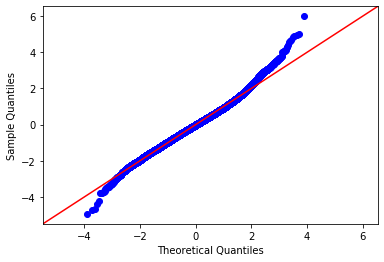

In [52]:
qqplot(results1)

Looks good. We previously removed extreme outliers during the cleaning of the data. There may still be some, but in order to preserve as much of the data as possible, this looks pretty good and we can leave it as is (not remove more outliers).

### Residuals vs. Fitted Plot 

Test for heteroskedasticity.

In [53]:
# Plot model residuals vs. fitted to test for heteroskedasticity

def heterosk(results):
    '''
    Takes in results from the fitted model and outputs a plot 
    of the residuals vs. the fitted values. 
    '''
    plt.scatter(results.fittedvalues, results.resid, alpha=0.5,s=5)
    plt.plot(results.fittedvalues, [0 for i in range(len(results.fittedvalues))]);
    return plt.show()

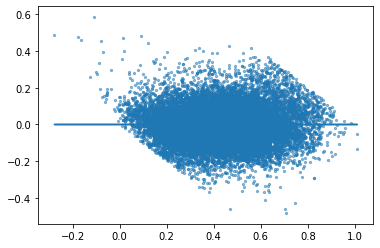

In [54]:
heterosk(results1)

Looks homoskedastic rather than heteroskedastic. Looks good. 

In [55]:
# Define function to output plot of the model coefficients

def coefplot(results):
    '''
    Takes in results of OLS model and returns a plot of 
    the coefficients with 95% confidence intervals.
    
    Removes intercept, so if uncentered will return error.
    '''
    # Create dataframe of results summary 
    coef_df = pd.DataFrame(results.summary().tables[1].data)
    
    # Add column names
    coef_df.columns = coef_df.iloc[0]

    # Drop the extra row with column labels
    coef_df=coef_df.drop(0)

    # Set index to variable names 
    coef_df = coef_df.set_index(coef_df.columns[0])

    # Change datatype from object to float
    coef_df = coef_df.astype(float)

    # Get errors; (coef - lower bound of conf interval)
    errors = coef_df['coef'] - coef_df['[0.025']
    
    # Append errors column to dataframe
    coef_df['errors'] = errors

    # Drop the constant for plotting
    coef_df = coef_df.drop(['const'])

    # Sort values by coef ascending
    coef_df = coef_df.sort_values(by=['coef'])

    ### Plot Coefficients ###

    # x-labels
    variables = list(coef_df.index.values)
    
    # Add variables column to dataframe
    coef_df['variables'] = variables

    # Define figure, axes, and plot
    fig, ax = plt.subplots(figsize=(15, 10))
    # Error bars for 95% confidence interval
    coef_df.plot(x='variables', y='coef', kind='bar',
                 ax=ax, color='none', fontsize=18, 
                 ecolor='black',capsize=7,
                 yerr='errors', legend=False)
    # Set title & labels
    plt.title('')
    ax.set_ylabel('Coefficients',fontsize=18)
    ax.set_xlabel('Features',fontsize=18)
    # Coefficients
    ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
               marker='s', s=40, 
               y=coef_df['coef'], color='black')
    # Line to define zero on the y-axis
    ax.axhline(y=0, linestyle='--', color='red', linewidth=1);
    return plt.show()

Let's check out the residuals. I'm excited to see which coefficients have the greatest effect on the price of a house. (The highest coefficient that is.)

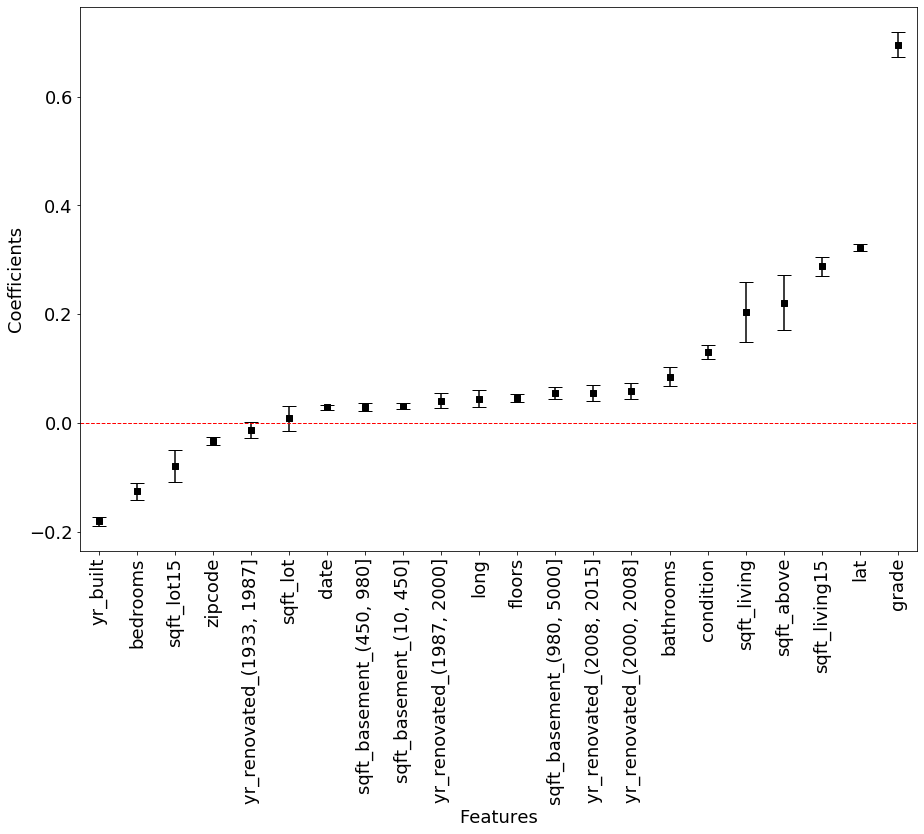

In [56]:
# Plot coefficients w/95% confidence intervals for Model 1
coefplot(results1)

No big suprise here. As we guessed earlier, it appears to be grade. This makes sense as higher grade is more of a luxury home and we could see the relationship appeared to be slightly exponential. 

We could add this as a polynomial feature instead and see how the model does, but our R^2 looks pretty good and we are able to interpret results. If need be we can always revisit later. For now let's keep moving along.

Next we'll take a look at the interactions between our feature variables to see if there are any interactions going on that better predict price than the features alone.

### Interactions

In [57]:
# Import package we'll be using
from itertools import combinations

# Find top interactions using R^2 value

# Use combinations from itertools to create all possible combinations of two features
feat_combinations = combinations(X_train.columns, 2)

# Initiate empty list to fill for interactons values
interactions = []

# for i, (feature1,feature2) in feature_combinations:
for i, (a, b) in enumerate(feat_combinations):
    # fill interatctions list with feature a * feature b
    X_train['interaction'] = X_train[a] * X_train[b]
    R2 = np.mean(cross_val_score(linreg, X_train, y_train, scoring='r2', cv=crossval))
    if R2 > baseline_R2:
        interactions.append((a, b, round(R2,5)))

# Print out the top 5 interactions
print('Top 5 interactions: %s' %sorted(interactions, key=lambda inter: inter[2], reverse=True)[:5])

Top 5 interactions: [('sqft_living', 'grade', 0.74528), ('bathrooms', 'grade', 0.74463), ('sqft_living', 'bathrooms', 0.74384), ('lat', 'sqft_lot15', 0.7432), ('long', 'zipcode', 0.7432)]


We can see here that the top 3 interactions are all between sqft_living, grade, and bathrooms. This is affirming as we could see in our EDA that these three each had apparent relationships with price.

"Top 3 interactions: [('sqft_living', 'grade', 0.74664), ('bathrooms', 'grade', 0.7455), ('sqft_living', 'bathrooms', 0.74479)]". Each time we run this model, sometimes the 3rd one switches, but this is the one that outputs the most, so we're going to go ahead with these three.

Let's add these interactions into our model one at a time to see how they affect the R^2 and MSE values of our model.

### Model 1: All Features w/Top 3 Interactions

In [58]:
#Build a final model with interactions

final = X.copy()

final['sqft_living*grade'] = final['sqft_living'] * final['grade']
final['bathrooms*grade'] = final['bathrooms'] * final['grade']
final['sqft_living*bathrooms'] = final['sqft_living'] * final['bathrooms']

In [59]:
# Build Model

final = sm.add_constant(final)
model = sm.OLS(y,final)
results2a = model.fit()

# MSE of the residuals
print(f"MSE: {results2a.mse_resid}")

results2a.summary()

MSE: 0.009121549164761869


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     2466.
Date:                Fri, 15 May 2020   Prob (F-statistic):               0.00
Time:                        17:04:01   Log-Likelihood:                 19300.
No. Observations:               20747   AIC:                        -3.855e+04
Df Residuals:                   20721   BIC:                        -3.834e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.2376      0.019    -12.692      0.000      -0.274      -0.201
sqft_basement_(10, 450]       0.0296      0.003     10.246      0.000       0.024       0.035
sqft_basement_(450, 980]      0.0191      0.004      4.891      0.000       0.011       0.027
sqft_basement_(980, 5000]     0.0285      0.005      5.229      0.000       0.018       0.039
yr_renovated_(1933, 1987]    -0.0071      0.007     -0.983      0.326      -0.021       0.007
yr_renovated_(1987, 2000]     0.0456      0.007      6.446      0.000       0.032       0.059
yr_renovated_(2000, 2008]     0.0580      0.008      7.640      0.000       0.043       0.073
yr_renovated_(2008, 2015]     0.0583      0.008      7.708      0.000       0.043       0.073
date                          0.0289      0.002     12.563      0.000       0.024       0.033
sqft_living                  -0.2233      0.055     -4.025      0.000      -0.332      -0.115
lat                           0.3222      0.003     99.539      0.000       0.316       0.329
long                          0.0462      0.008      5.921      0.000       0.031       0.062
bedrooms                     -0.0995      0.008    -12.752      0.000      -0.115      -0.084
bathrooms                    -0.1901      0.054     -3.554      0.000      -0.295      -0.085
floors                        0.0430      0.004     11.285      0.000       0.036       0.050
condition                     0.1418      0.007     21.351      0.000       0.129       0.155
grade                         0.1698      0.040      4.275      0.000       0.092       0.248
sqft_lot                      0.0016      0.011      0.144      0.885      -0.020       0.024
sqft_above                    0.0972      0.026      3.743      0.000       0.046       0.148
yr_built                     -0.1720      0.004    -42.245      0.000      -0.180      -0.164
sqft_living15                 0.2626      0.009     28.371      0.000       0.244       0.281
sqft_lot15                   -0.0964      0.014     -6.702      0.000      -0.125      -0.068
zipcode                      -0.0372      0.003    -11.761      0.000      -0.043      -0.031
sqft_living*grade             0.6761      0.083      8.148      0.000       0.513       0.839
bathrooms*grade               0.2525      0.093      2.728      0.006       0.071       0.434
sqft_living*bathrooms         0.2692      0.052      5.153      0.000       0.167       0.372
==============================================================================
Omnibus:                      434.939   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              705.865
Skew:                           0.202   Prob(JB):                    5.29e-154
Kurtosis:                       3.808   C

We can see that sqft_lot is no longer significant. Let's go ahead and remove it and see how it affects our model.

In [60]:
final = final.drop(['sqft_lot','yr_renovated_(1933, 1987]'], axis=1)

In [61]:
# Build Model

final = sm.add_constant(final)
model = sm.OLS(y,final)
results2b = model.fit()

# MSE of the residuals
print(f"MSE: {results2b.mse_resid}")

results2b.summary()

MSE: 0.009121103625239048


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     2681.
Date:                Fri, 15 May 2020   Prob (F-statistic):               0.00
Time:                        17:04:02   Log-Likelihood:                 19299.
No. Observations:               20747   AIC:                        -3.855e+04
Df Residuals:                   20723   BIC:                        -3.836e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.2378      0.019    -12.708      0.000      -0.274      -0.201
sqft_basement_(10, 450]       0.0296      0.003     10.242      0.000       0.024       0.035
sqft_basement_(450, 980]      0.0191      0.004      4.885      0.000       0.011       0.027
sqft_basement_(980, 5000]     0.0285      0.005      5.218      0.000       0.018       0.039
yr_renovated_(1987, 2000]     0.0458      0.007      6.486      0.000       0.032       0.060
yr_renovated_(2000, 2008]     0.0582      0.008      7.674      0.000       0.043       0.073
yr_renovated_(2008, 2015]     0.0585      0.008      7.739      0.000       0.044       0.073
date                          0.0289      0.002     12.573      0.000       0.024       0.033
sqft_living                  -0.2248      0.055     -4.054      0.000      -0.333      -0.116
lat                           0.3223      0.003     99.686      0.000       0.316       0.329
long                          0.0462      0.008      5.936      0.000       0.031       0.061
bedrooms                     -0.0992      0.008    -12.723      0.000      -0.114      -0.084
bathrooms                    -0.1894      0.053     -3.541      0.000      -0.294      -0.085
floors                        0.0428      0.004     11.391      0.000       0.035       0.050
condition                     0.1420      0.007     21.434      0.000       0.129       0.155
grade                         0.1691      0.040      4.261      0.000       0.091       0.247
sqft_above                    0.0969      0.026      3.739      0.000       0.046       0.148
yr_built                     -0.1715      0.004    -42.778      0.000      -0.179      -0.164
sqft_living15                 0.2626      0.009     28.390      0.000       0.244       0.281
sqft_lot15                   -0.0948      0.007    -12.653      0.000      -0.110      -0.080
zipcode                      -0.0372      0.003    -11.766      0.000      -0.043      -0.031
sqft_living*grade             0.6790      0.083      8.189      0.000       0.516       0.841
bathrooms*grade               0.2509      0.093      2.711      0.007       0.070       0.432
sqft_living*bathrooms         0.2692      0.052      5.154      0.000       0.167       0.372
==============================================================================
Omnibus:                      433.682   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              703.244
Skew:                           0.202   Prob(JB):                    1.96e-153
Kurtosis:                       3.807   Cond. No.                         481.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the

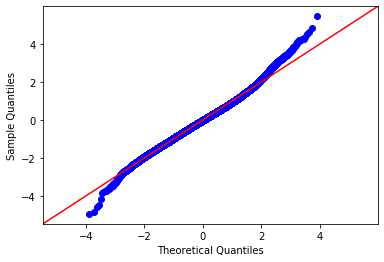

In [62]:
# Plot q-q for Model 2 residuals
qqplot(results2b)

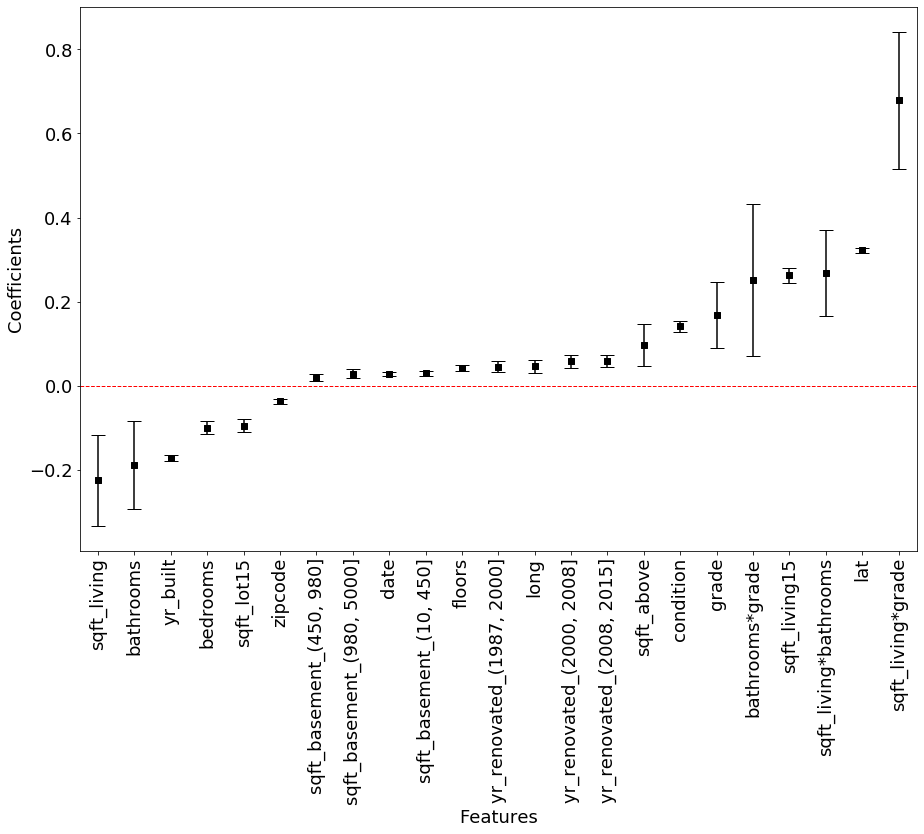

In [63]:
# Plot coefficients w/95% confidence intervals for Model 2
coefplot(results2b)

### Model 3: All Features w/Top 5 Interactions

Since the top 5 interactions were all so close to each other in R^2 values, I'm curious to see how the Model performs with all 5, and if we can gain any additional insights with the resulting coefficients.

In [64]:
# Add 4th & 5th ranked interactions
final['sqft_living*sqft_above'] = final['sqft_living'] * final['sqft_above']
final['grade*sqft_above'] = final['grade'] * final['sqft_above']

In [65]:
# Build Model 3

final_const = sm.add_constant(final)
model = sm.OLS(y,final_const)
results3 = model.fit()

# MSE of the residuals
print(f"MSE: {results3.mse_resid}")

results3.summary()

MSE: 0.00910481681898887


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     2472.
Date:                Fri, 15 May 2020   Prob (F-statistic):               0.00
Time:                        17:04:02   Log-Likelihood:                 19319.
No. Observations:               20747   AIC:                        -3.859e+04
Df Residuals:                   20721   BIC:                        -3.838e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.2445      0.019    -12.860      0.000      -0.282      -0.207
sqft_basement_(10, 450]       0.0257      0.003      8.685      0.000       0.020       0.031
sqft_basement_(450, 980]      0.0122      0.004      3.002      0.003       0.004       0.020
sqft_basement_(980, 5000]     0.0146      0.006      2.440      0.015       0.003       0.026
yr_renovated_(1987, 2000]     0.0449      0.007      6.353      0.000       0.031       0.059
yr_renovated_(2000, 2008]     0.0560      0.008      7.387      0.000       0.041       0.071
yr_renovated_(2008, 2015]     0.0576      0.008      7.628      0.000       0.043       0.072
date                          0.0288      0.002     12.566      0.000       0.024       0.033
sqft_living                  -0.5491      0.082     -6.706      0.000      -0.710      -0.389
lat                           0.3226      0.003     99.816      0.000       0.316       0.329
long                          0.0446      0.008      5.733      0.000       0.029       0.060
bedrooms                     -0.0983      0.008    -12.558      0.000      -0.114      -0.083
bathrooms                    -0.1913      0.054     -3.571      0.000      -0.296      -0.086
floors                        0.0435      0.004     11.464      0.000       0.036       0.051
condition                     0.1405      0.007     21.219      0.000       0.128       0.154
grade                         0.1989      0.043      4.647      0.000       0.115       0.283
sqft_above                    0.4404      0.071      6.190      0.000       0.301       0.580
yr_built                     -0.1728      0.004    -42.932      0.000      -0.181      -0.165
sqft_living15                 0.2626      0.009     28.410      0.000       0.245       0.281
sqft_lot15                   -0.0929      0.007    -12.392      0.000      -0.108      -0.078
zipcode                      -0.0370      0.003    -11.679      0.000      -0.043      -0.031
sqft_living*grade             1.2645      0.145      8.733      0.000       0.981       1.548
bathrooms*grade               0.3616      0.105      3.457      0.001       0.157       0.567
sqft_living*bathrooms         0.1394      0.073      1.907      0.057      -0.004       0.283
sqft_living*sqft_above        0.1863      0.077      2.422      0.015       0.036       0.337
grade*sqft_above             -0.8028      0.128     -6.250      0.000      -1.055      -0.551
==============================================================================
Omnibus:                      440.599   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              724.623
Skew:                           0.200   Prob(JB):                    4.47e-158
Kurtosis:                       3.824   C

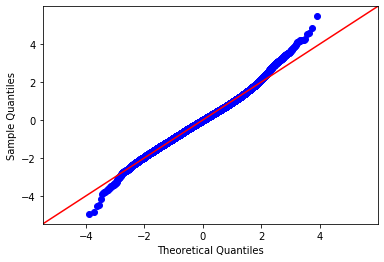

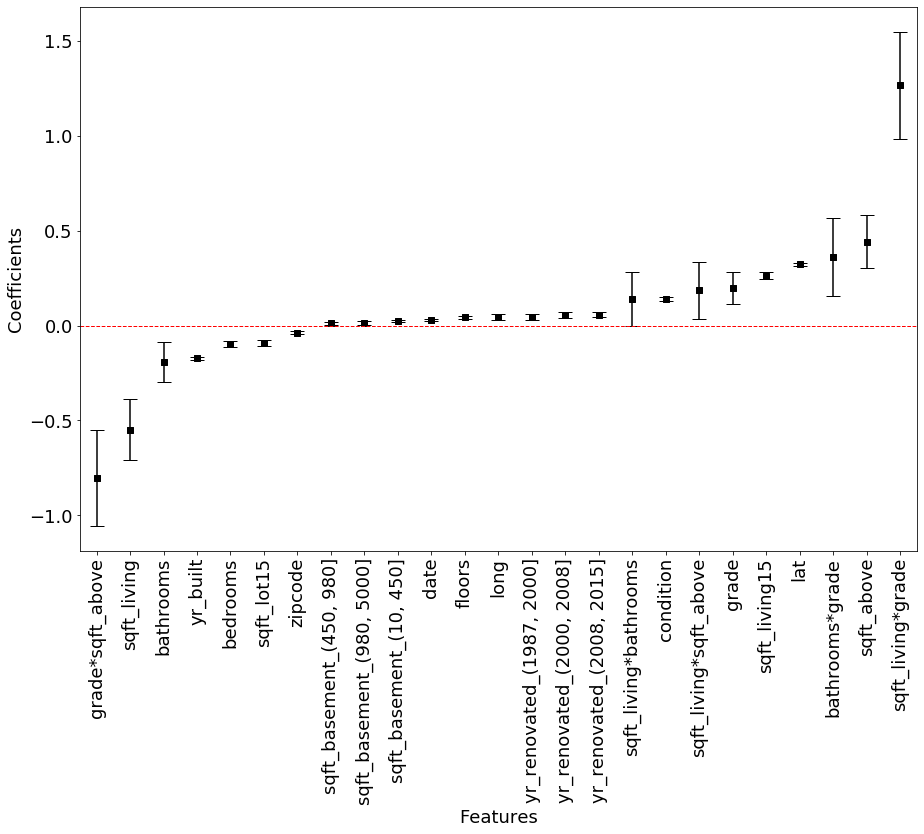

In [66]:
# Plot q-q for Model 3 residuals
qqplot(results3)

# Plot coefficients w/95% confidence intervals for Model 3
coefplot(results3)

## Further Research

There appears to be a neighborhood effect. It would be great to explore the different neighborhoods by creating a map or conducting a cluster analysis [look up cluster analysis to see if it's fitting here] that shows the different neighborhoods and home prices.

Getting a good deal on an older home or lower grade home that's in a higher price range neighborhood, or perhaps on the fringe of such a neighborhood, and upgrading its grade through utilizing high-end materials and luxury appliances would greatly increase the value of a home and thus the return on investment.

The data in this model were normalized (log transformed) and min-max scaled to meet the normality assumption and so all features could be equally compared. For further research it would be great to create a model that may not meet the normality assumption, but without normalized data so one could enter in the prospective home details along with the grade intended to upgrade to and estimate the amount of value the upgrade would add to the home. 